In [1]:
import pandas as pd
import sys
import importlib
sys.path.append("../scripts/")
import regex_gradle
import regex_maven
import rq_aux
import re
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import numpy as np

importlib.reload(regex_gradle)
importlib.reload(regex_maven)
importlib.reload(rq_aux)
sns.set(color_codes=True)
sns.set_style("whitegrid")
 #"small", "medium", "large"
sizes1 = rq_aux.sizes1

#"all", "small", "medium", "large"
sizes2 = rq_aux.sizes2 

In [2]:
rq_aux.check_categories(regex_maven)

rq_aux.check_categories(regex_gradle)

In [3]:
noerror = False
output_path = "../data/output_data/"
#overview_dataset = "overview-subtask-noerror-True.csv"
overview_dataset = f"{output_path}overview_daylight_witherror.csv"
alltasks_dataset = f"{output_path}all_tasks_witherror.csv"

In [4]:
# Read Data Frame: Workflow has Subtasks that failed
df = pd.read_csv(overview_dataset)

In [5]:
df_maven = df[df["is_maven"]]
df_gradle = df[df["is_gradle"]]
df_both = df[df["is_maven"] & df["is_gradle"]]
df_none = df[(df["is_maven"] == False) & (df["is_gradle"] == False)]

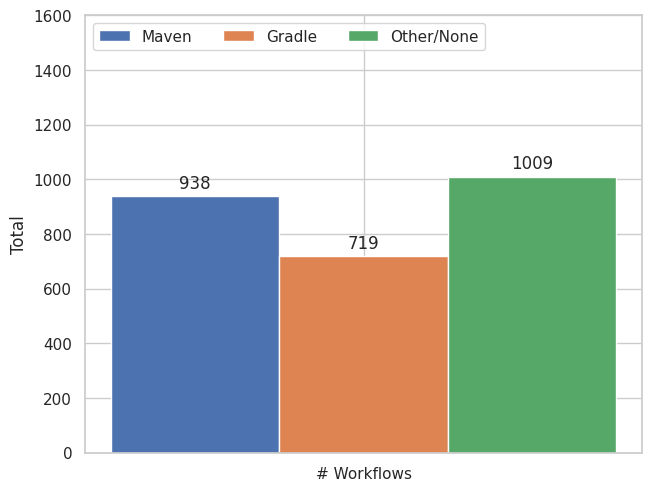

In [6]:
properties = ["# Workflows"]

bars = {
    'Maven':  len(df_maven),
    'Gradle': len(df_gradle),
    #'Other/None':  len(df) - len(df_maven) - len(df_gradle) + len(df_both),
    'Other/None' : len(df_none),
}

title = 'Number of Workflows by Build Automation Tool'
title = ''

rq_aux.plot_bars(properties, bars, title, lim=1600, ylabel = "Total")

In [7]:
# Remove Maven Workflows Without Maven Subtasks
df_maven = rq_aux.remove_workflows_no_subtask(df_maven, 'maven_', regex_maven.plugins)

Workflows No Subtask: Removed 207 workflows: 938 -> 731


In [8]:
# Remove Gradle Workflows Without Gradle Subtasks
df_gradle = rq_aux.remove_workflows_no_subtask(df_gradle, 'gradle_', regex_gradle.plugins)

Workflows No Subtask: Removed 302 workflows: 719 -> 417


In [9]:
df_maven_size = rq_aux.create_dfs_size(df_maven, 'is_maven')

sum_maven = {}
for x in sizes2:
  sum_maven[x] = rq_aux.make_dict_subtask(df_maven_size[x], "maven_", regex_maven.plugins)

for key, value in sum_maven.items():
    rq_aux.print_ratios_summary(key.title(), value, sum_maven['all'])

*** All ***
N_Work:  731 (100.0%);  N:  135944 (100.0%);  Energy:  20243267 (100.0%);  Seconds:  1095565692628 (100.0%);  
*** Small ***
N_Work:  88 (12.0%);  N:  7734 (5.7%);  Energy:  618145 (3.1%);  Seconds:  35638455380 (3.3%);  
*** Medium ***
N_Work:  372 (50.9%);  N:  49604 (36.5%);  Energy:  9780473 (48.3%);  Seconds:  459737496565 (42.0%);  
*** Large ***
N_Work:  271 (37.1%);  N:  78606 (57.8%);  Energy:  9844648 (48.6%);  Seconds:  600189740683 (54.8%);  


In [10]:
df_gradle_size = rq_aux.create_dfs_size(df_gradle, 'is_gradle')

sum_gradle = {}
for x in sizes2:
  sum_gradle[x] = rq_aux.make_dict_subtask(df_gradle_size[x], "gradle_", regex_gradle.plugins)

for key, value in sum_gradle.items():
    rq_aux.print_ratios_summary(key.title(), value, sum_gradle['all'])

*** All ***
N_Work:  417 (100.0%);  N:  45259 (100.0%);  Energy:  6221775 (100.0%);  Seconds:  286877252134 (100.0%);  
*** Small ***
N_Work:  40 (9.6%);  N:  1198 (2.6%);  Energy:  162449 (2.6%);  Seconds:  7902238194 (2.8%);  
*** Medium ***
N_Work:  234 (56.1%);  N:  16714 (36.9%);  Energy:  2066006 (33.2%);  Seconds:  93138667065 (32.5%);  
*** Large ***
N_Work:  143 (34.3%);  N:  27347 (60.4%);  Energy:  3993320 (64.2%);  Seconds:  185836346875 (64.8%);  


*** Maven ***
All:  26772675 (25.6%);  Small:  639852 (31.0%);  Medium:  12185628 (38.4%);  Large:  13947195 (19.7%);  
*** Maven Plugins ***
All:  20243267 (19.3%);  Small:  618145 (29.9%);  Medium:  9780473 (30.8%);  Large:  9844648 (13.9%);  
*** Gradle ***
All:  6153687 (5.9%);  Small:  154155 (7.5%);  Medium:  2259245 (7.1%);  Large:  3740286 (5.3%);  
*** Gradle Tasks ***
All:  6221775 (5.9%);  Small:  162449 (7.9%);  Medium:  2066006 (6.5%);  Large:  3993320 (5.6%);  


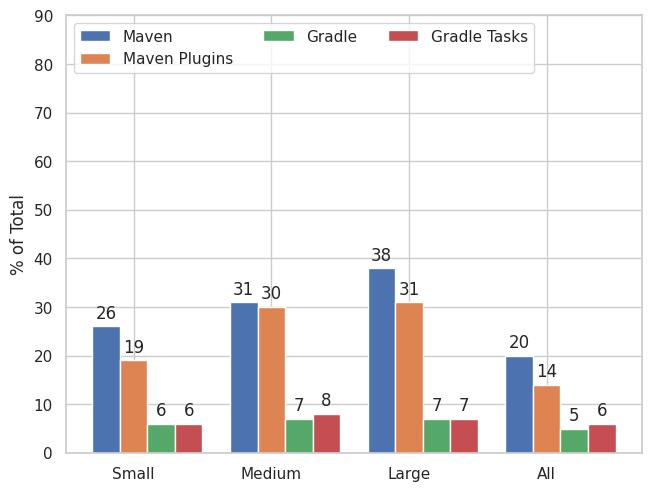

In [11]:
bar_energy = {
    "maven" :  {},
    "mav_tasks": {},
    "gradle" : {},
    "grad_tasks" : {},
    "total"  : {}
}

for x in sizes2:
    bar_energy["maven"][x]   = df_maven_size[x]["maven_energy"].sum()
    bar_energy["mav_tasks"][x]   = sum_maven[x]["energy"]
    bar_energy["gradle"][x]  = df_gradle_size[x]["gradle_energy"].sum()
    bar_energy["grad_tasks"][x]  = sum_gradle[x]["energy"].sum()
    bar_energy["total"][x]   = df_maven_size[x]["energy"].sum() + df_gradle_size[x]["energy"].sum()

rq_aux.print_ratios_summary("Maven",          bar_energy["maven"],  bar_energy["total"])
rq_aux.print_ratios_summary("Maven Plugins",  bar_energy["mav_tasks"],  bar_energy["total"])
rq_aux.print_ratios_summary("Gradle",         bar_energy["gradle"], bar_energy["total"])
rq_aux.print_ratios_summary("Gradle Tasks",   bar_energy["grad_tasks"], bar_energy["total"])

properties  = ("Small", "Medium", "Large", "All")

bars = {
    'Maven':  rq_aux.get_ratios(bar_energy["maven"],  bar_energy["total"], 0),
    'Maven Plugins':  rq_aux.get_ratios(bar_energy["mav_tasks"],  bar_energy["total"], 0),
    'Gradle': rq_aux.get_ratios(bar_energy["gradle"], bar_energy["total"], 0),
    'Gradle Tasks': rq_aux.get_ratios(bar_energy["grad_tasks"], bar_energy["total"], 0),
}

title = '% of Energy Related to Maven/Gradle Tasks by Size of Project'


rq_aux.plot_bars(properties, bars, title = '',lim=90, width=0.2)

*** Maven Plugins ***
All:  20243267 (24.5%);  Small:  618145 (37.3%);  Medium:  9780473 (37.6%);  Large:  9844648 (17.9%);  
*** Gradle Tasks ***
All:  6221775 (28.1%);  Small:  162449 (39.7%);  Medium:  2066006 (36.0%);  Large:  3993320 (25.0%);  


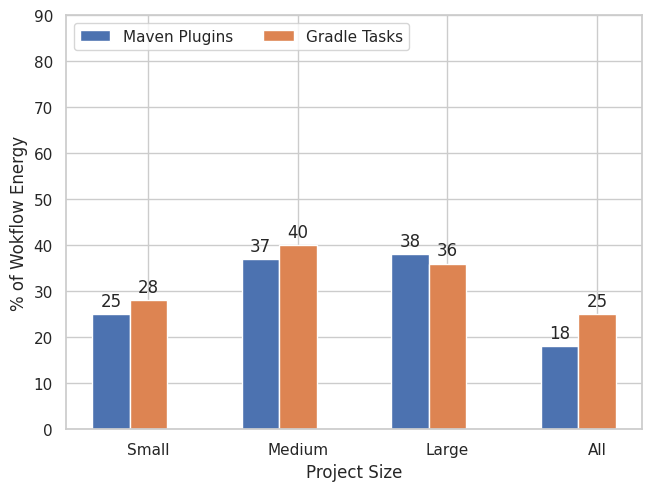

In [12]:
bar_energy = {
   # "maven" :  {},
    "mav_tasks": {},
   # "gradle" : {},
    "grad_tasks" : {},
    "total_maven"  : {},
    "total_gradle" : {}
}

for x in sizes2:
    #bar_energy["maven"][x]   = df_maven_size[x]["maven_energy"].sum()
    bar_energy["mav_tasks"][x]   = sum_maven[x]["energy"]
    #bar_energy["gradle"][x]  = df_gradle_size[x]["gradle_energy"].sum()
    bar_energy["grad_tasks"][x]  = sum_gradle[x]["energy"].sum()
    bar_energy["total_maven"][x]   = df_maven_size[x]["energy"].sum()
    bar_energy["total_gradle"][x]   = df_gradle_size[x]["energy"].sum()

#rq_aux.print_ratios_summary("Maven",          bar_energy["maven"],  bar_energy["total"])
rq_aux.print_ratios_summary("Maven Plugins",  bar_energy["mav_tasks"],  bar_energy["total_maven"])
#rq_aux.print_ratios_summary("Gradle",         bar_energy["gradle"], bar_energy["total"])
rq_aux.print_ratios_summary("Gradle Tasks",   bar_energy["grad_tasks"], bar_energy["total_gradle"])

properties  = ("Small", "Medium", "Large", "All")

bars = {
    #'Maven':  rq_aux.get_ratios(bar_energy["maven"],  bar_energy["total"], 0),
    'Maven Plugins':  rq_aux.get_ratios(bar_energy["mav_tasks"],  bar_energy["total_maven"], 0),
    #'Gradle': rq_aux.get_ratios(bar_energy["gradle"], bar_energy["total"], 0),
    'Gradle Tasks': rq_aux.get_ratios(bar_energy["grad_tasks"], bar_energy["total_gradle"], 0),
}

title = '% of Energy Related to Maven/Gradle Tasks by Size of Project'


rq_aux.plot_bars(properties, bars, title = '',lim=90, ylabel='% of Wokflow Energy', xlabel='Project Size')

In [13]:
df_all_maven = rq_aux.read_all_tasks(alltasks_dataset, "maven", noerror)

all_maven_energy = rq_aux.get_energy_all_tasks(df_all_maven)

Build tool maven = 135944
len small = 7734
Group len small = 88
len medium = 49604
Group len medium = 372
len large = 78606


Group len large = 271


In [14]:
for key, value in all_maven_energy.items():
    total_energy = sum_maven[key]['energy']
    assert abs(sum(value) - total_energy) < 0.000001, f"Different sum: {sum(value) - total_energy}"
    print(f"{key.title()}: Workflows: {len(value)}", end="")
    rq_aux.print_ratio(sum(value), sum(all_maven_energy['all']), '')

Small: Workflows: 88:  618145 (3.1%)
Medium: Workflows: 372:  9780473 (48.3%)
Large: Workflows: 271:  9844648 (48.6%)
All: Workflows: 731:  20243267 (100.0%)


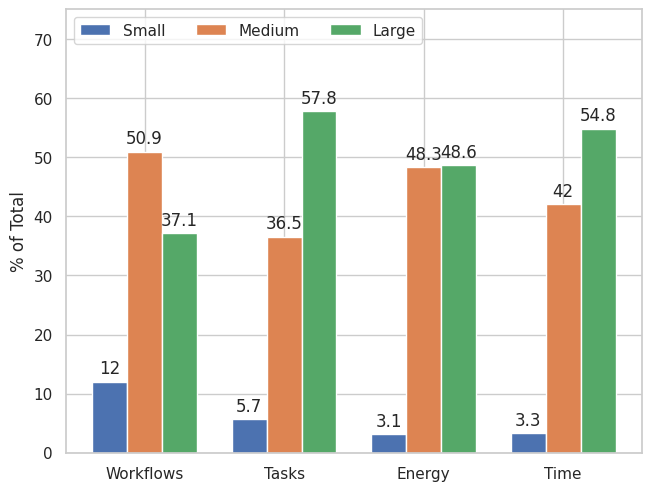

In [15]:
properties  = ("Workflows", "Tasks", "Energy", "Time")

bars = {}
for x in sizes1:
    bars[x.title()] = rq_aux.get_ratios(sum_maven[x], sum_maven['all'])

title = 'Number of Maven Projects, Energy Consumption and Execution Time by Size of Project'

rq_aux.plot_bars(properties, bars, '',lim=75)

In [16]:
df_all_gradle = rq_aux.read_all_tasks(alltasks_dataset, "gradle", noerror=False)

all_gradle_energy = rq_aux.get_energy_all_tasks(df_all_gradle)

Build tool gradle = 45259
len small = 1198
Group len small = 40
len medium = 16714
Group len medium = 234
len large = 27347
Group len large = 143


In [17]:
for key, value in all_gradle_energy.items():
    total_energy = sum_gradle[key]['energy']
    assert abs(sum(value) - total_energy) < 0.000001, f"Different sum: {sum(value) - total_energy}"
    print(f"{key.title()}: Workflows: {len(value)}", end="")
    rq_aux.print_ratio(sum(value), sum(all_gradle_energy['all']), '')

Small: Workflows: 40:  162449 (2.6%)
Medium: Workflows: 234:  2066006 (33.2%)
Large: Workflows: 143:  3993320 (64.2%)
All: Workflows: 417:  6221775 (100.0%)


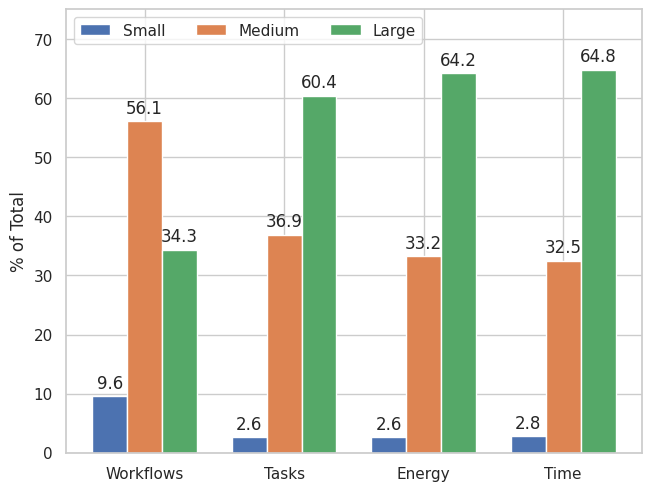

In [18]:
bars = {}
for x in sizes1:
    bars[x.title()] = rq_aux.get_ratios(sum_gradle[x], sum_gradle['all'])

title = 'Number of Gradle Workflows, Energy Consumption and Execution Time by Size of Project'

rq_aux.plot_bars(properties, bars, title='',lim=75)

Text(0, 0.5, '# Workflows')

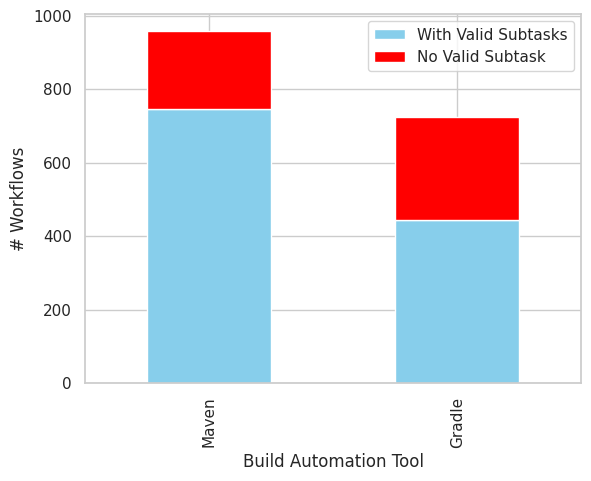

In [19]:
df = pd.DataFrame({'With Valid Subtasks' : [745, 444],
                   'No Valid Subtask'    : [213, 281],
                  },
                  index=['Maven', 'Gradle'])


df.plot(kind='bar', stacked=True, color=['skyblue', 'red'])

plt.xlabel('Build Automation Tool')
plt.ylabel('# Workflows')

#plt.title('Workflows with Valid Subtasks')

In [20]:
maven_energy = rq_aux.get_energy_all_tasks(df_all_maven, group=False, all=False)

len small = 7734
len medium = 49604
len large = 78606


In [21]:
gradle_energy = rq_aux.get_energy_all_tasks(df_all_gradle, group=False, all=False)

len small = 1198
len medium = 16714
len large = 27347


In [22]:
# Normality of the Energy Consumption of Maven tasks
for key, value in maven_energy.items():
  rq_aux.test_normality(value)

# Normality of the Energy Consumption of Gradle tasks
for key, value in gradle_energy.items():
  rq_aux.test_normality(value)


stat=18030.228, p=0.000
probably non gaussian
stat=203011.928, p=0.000
probably non gaussian
stat=252956.141, p=0.000
probably non gaussian
stat=2438.597, p=0.000
probably non gaussian
stat=51779.848, p=0.000
probably non gaussian
stat=88062.378, p=0.000
probably non gaussian


In [23]:
#perform the Mann-Whitney U test
print(stats.kruskal(*maven_energy.values()))

print("Small x Medium = ", stats.mannwhitneyu(maven_energy['small'], maven_energy['medium']))

print("Small x Large = ",stats.mannwhitneyu(maven_energy['small'], maven_energy['large']))

print("Medium x Large = ", stats.mannwhitneyu(maven_energy['medium'], maven_energy['large']))

KruskalResult(statistic=np.float64(50.05858970704403), pvalue=np.float64(1.348700005221915e-11))
Small x Medium =  MannwhitneyuResult(statistic=np.float64(199017933.0), pvalue=np.float64(1.0530348026301083e-07))
Small x Large =  MannwhitneyuResult(statistic=np.float64(317535155.0), pvalue=np.float64(8.797853752894931e-11))
Medium x Large =  MannwhitneyuResult(statistic=np.float64(1972134711.0), pvalue=np.float64(0.0004766968856443916))


In [24]:
# https://pypi.org/project/cliffs-delta/
from cliffs_delta import cliffs_delta

d, res = cliffs_delta(maven_energy['small'], maven_energy['medium'])
print(d,res)

d, res = cliffs_delta(maven_energy['small'], maven_energy['large'])
print(d,res)

d, res = cliffs_delta(maven_energy['medium'], maven_energy['large'])
print(d,res)

0.03753161814260956 negligible


0.04462867943530711 negligible


0.011565890841034614 negligible


In [25]:
# median and mean
def print_mean_median (msg, lst):
    print(f"{msg}, mean: {np.mean(lst):2f}, median: {np.median(lst):.2f}, std: {np.std(lst):.2f}")
    
for key, value in maven_energy.items():
  print_mean_median(key.title(), value)

Small, mean: 79.925698, median: 13.41, std: 658.37
Medium, mean: 197.171059, median: 10.94, std: 7238.66


Large, mean: 125.240415, median: 12.65, std: 2603.21


In [26]:
#perform the Mann-Whitney U test
print(stats.kruskal(*gradle_energy.values()))

print("Small x Medium = ", stats.mannwhitneyu(gradle_energy['small'], gradle_energy['medium']))

print("Small x Large = ",stats.mannwhitneyu(gradle_energy['small'], gradle_energy['large']))

print("Medium x Large = ", stats.mannwhitneyu(gradle_energy['medium'], gradle_energy['large']))

KruskalResult(statistic=np.float64(715.3441795407562), pvalue=np.float64(4.6236513881552655e-156))
Small x Medium =  MannwhitneyuResult(statistic=np.float64(9526616.0), pvalue=np.float64(0.005020682074042124))
Small x Large =  MannwhitneyuResult(statistic=np.float64(18203230.0), pvalue=np.float64(6.670254067229203e-11))
Medium x Large =  MannwhitneyuResult(statistic=np.float64(262913698.0), pvalue=np.float64(3.921942287770102e-155))


In [27]:
# https://pypi.org/project/cliffs-delta/
from cliffs_delta import cliffs_delta

d, res = cliffs_delta(gradle_energy['small'], gradle_energy['medium'])
print(d,res)

d, res = cliffs_delta(gradle_energy['small'], gradle_energy['large'])
print(d,res)

d, res = cliffs_delta(gradle_energy['medium'], gradle_energy['large'])
print(d,res)

-0.048450380884897906 negligible
0.11125043366178794 negligible
0.15041125234538322 small


In [28]:
for key, value in gradle_energy.items():
  print_mean_median(key.title(), value)

Small, mean: 135.600029, median: 17.03, std: 1148.25
Medium, mean: 123.609307, median: 17.65, std: 1584.88
Large, mean: 146.024060, median: 14.52, std: 2426.91


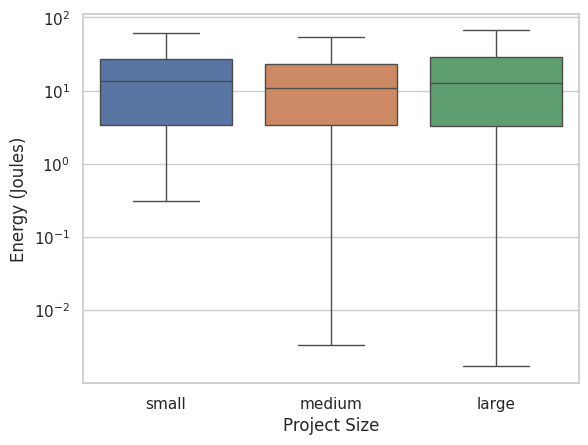

In [29]:
g = sns.boxplot(data = maven_energy, showfliers=False)#, log_scale=10)
g.set_xlabel('Project Size')
g.set_ylabel('Energy (Joules)')
g.set_yscale("log")

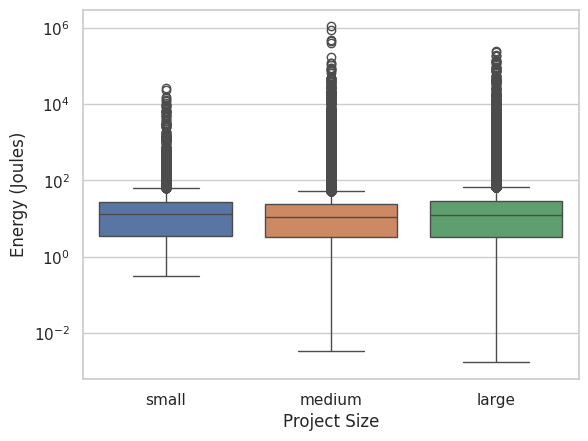

In [30]:
g = sns.boxplot(data = maven_energy, showfliers=True)#, log_scale=10)
g.set_xlabel('Project Size')
g.set_ylabel('Energy (Joules)')
g.set_yscale("log")

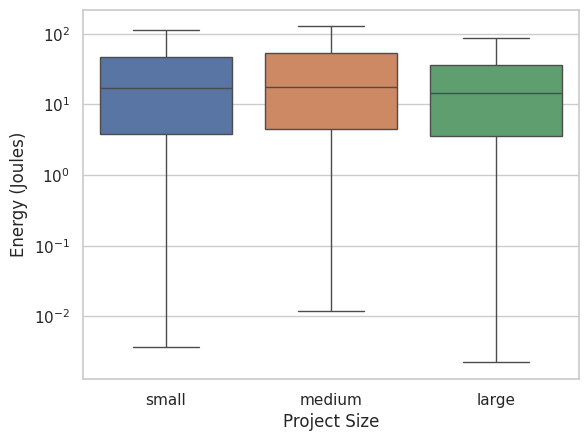

In [31]:
g = sns.boxplot(data = gradle_energy, showfliers=False)
g.set_xlabel('Project Size')
g.set_ylabel('Energy (Joules)')
g.set_yscale("log")

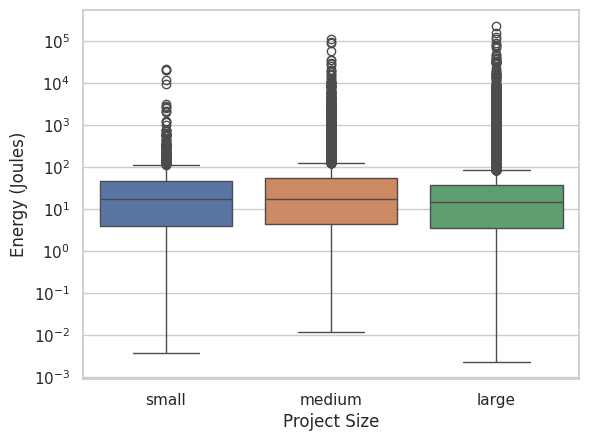

In [32]:
g = sns.boxplot(data = gradle_energy, showfliers=True)
g.set_xlabel('Project Size')
g.set_ylabel('Energy (Joules)')
g.set_yscale("log")

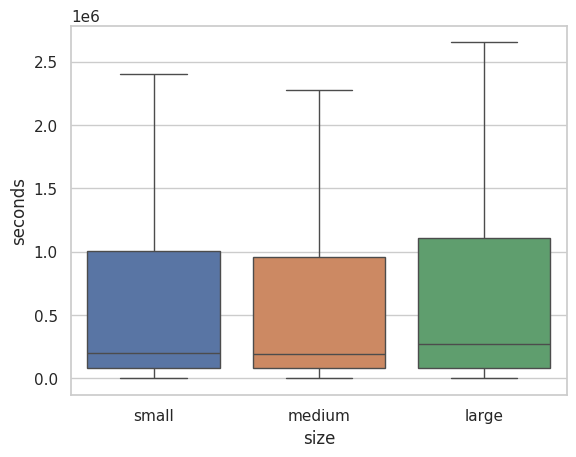

In [33]:
g = sns.boxplot(x = 'size', y = 'seconds', data = df_all_maven, showfliers=False, hue="size", order=sizes1)#, palette=my_colors) 

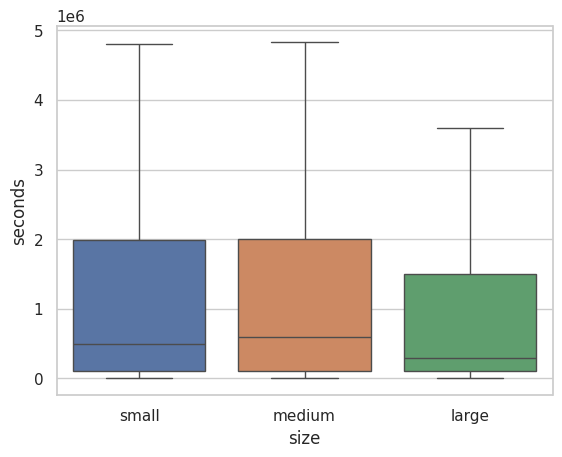

In [34]:
g = sns.boxplot(x = 'size', y = 'seconds', data = df_all_gradle, showfliers=False, hue="size", order=sizes1)#, palette=my_colors) 